In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import numpy as np
from IPython.display import Image
from notebook.services.config import ConfigManager

In [4]:
cm = ConfigManager()
cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
})

{'width': 1000, 'height': 600, 'scroll': True}

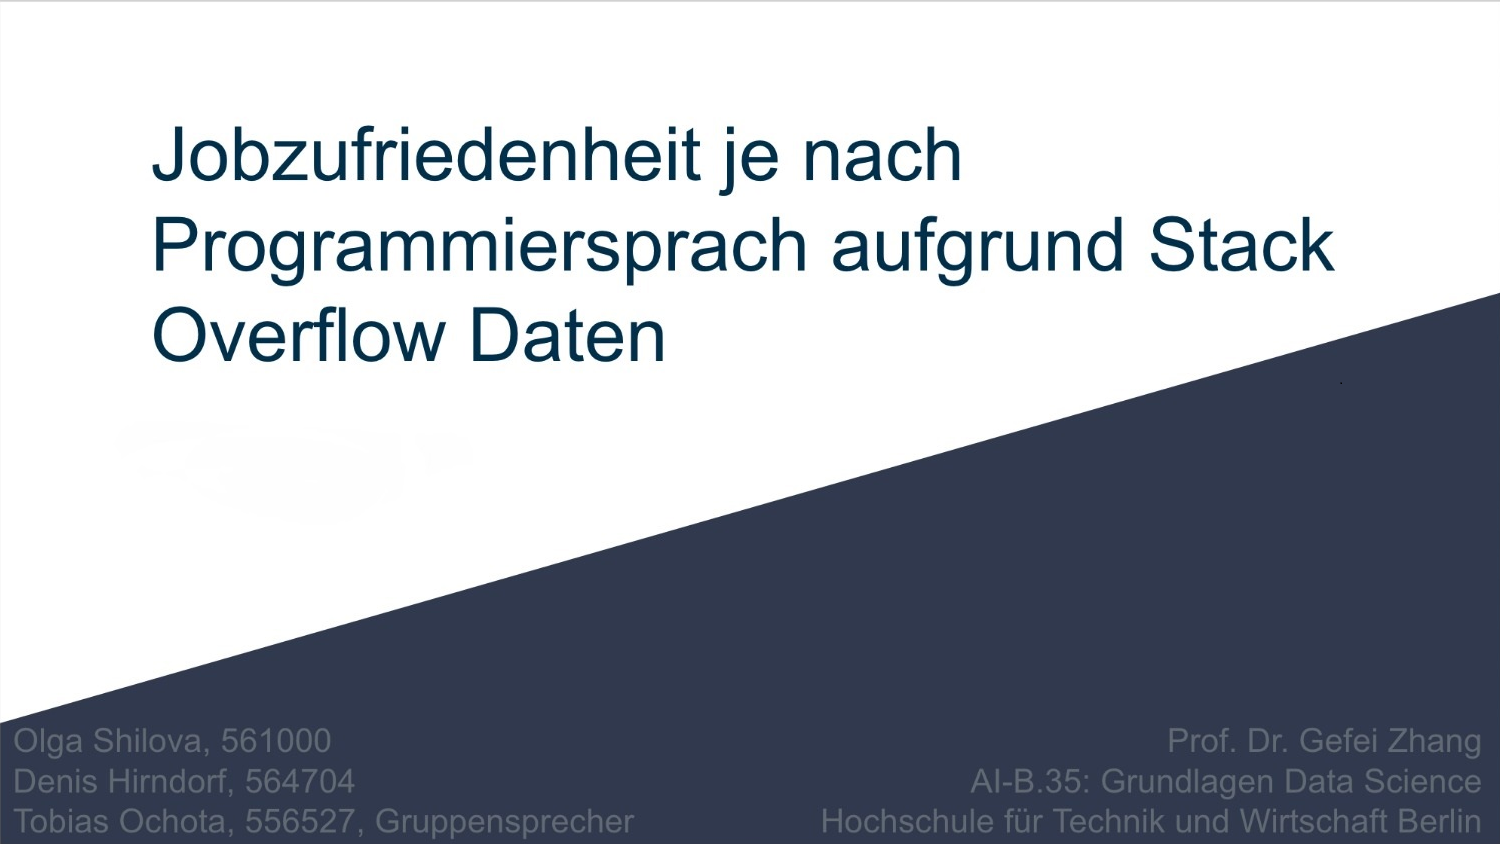

In [5]:
Image('deckblatt.png')

## Offizielle Statistiken

TIOBE Index for January 2019!

January Headline: Python is TIOBE's programming language of the year 2018!!
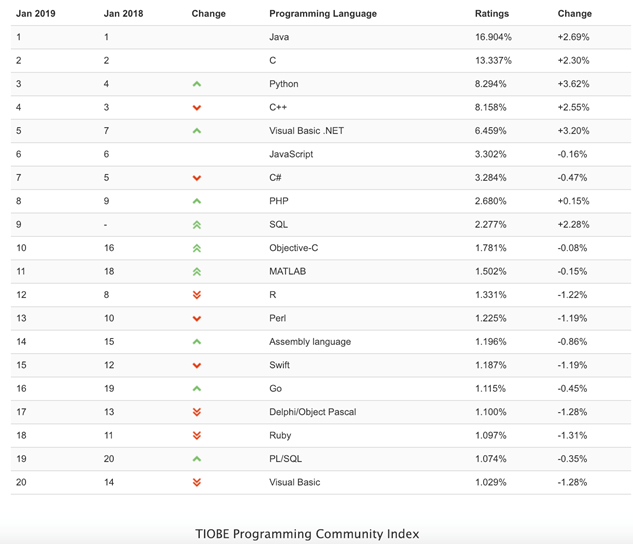
https://www.tiobe.com/tiobe-index/


PYPL PopularitY of Programming Language
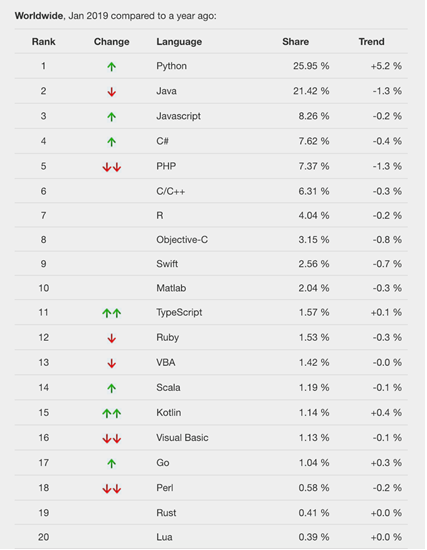
http://pypl.github.io/PYPL.html


Interactive: The Top Programming Languages 2018
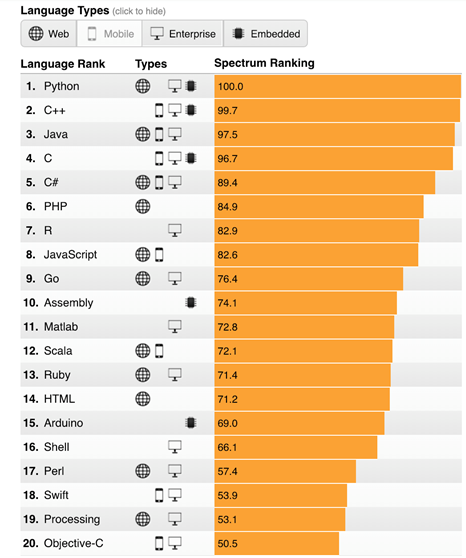
https://spectrum.ieee.org/static/interactive-the-top-programming-languages-2018


## Unsere Ziele:
- bestimmte Kriterien von Stack Overflow Benutzern auszulesen
- die Entwicklerumfrage von Stack Overflow analysieren und verarbeiten
- Diagramme zur Verfügung stellen
- Daten besser verstehen und interpretieren
- neue Erkenntnisse gewinnen 

## Datenbeschaffung

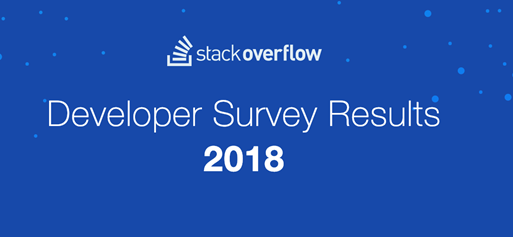

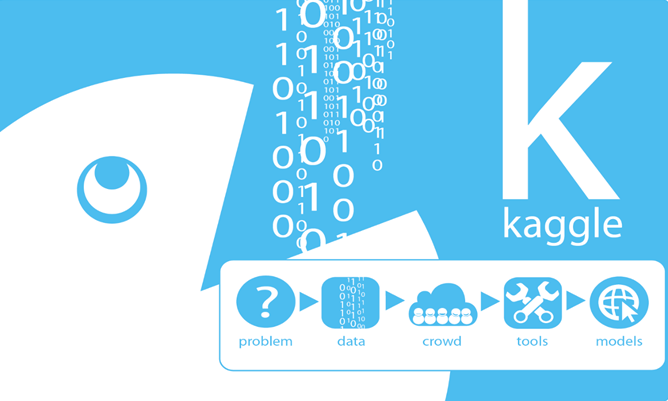

- survey_results_public.csv  → 98.900 Zeilen und 129 Spalten
- survey_results_schema.csv  → 129 Zeilen und 2 Spalten

## Daten lesen und verstehen!

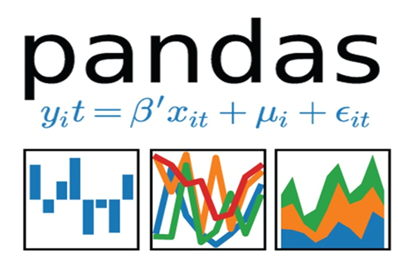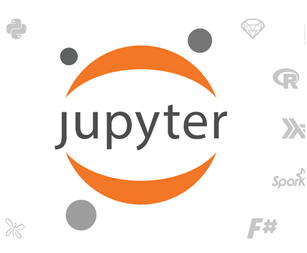

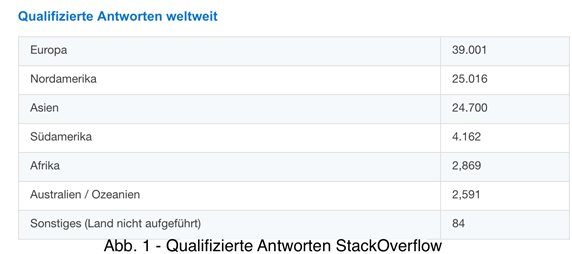

Stack Overflow → 98 423 Antworten

Daten Bereinigung → 98 443 Antworten

Der relative Fehler ist → 0,0002032%

In [2]:
#Datensatz der in daten_einlesen.ipynb entstanden ist einlesen
df = pd.read_csv("datensatz.csv")
plotly.offline.init_notebook_mode(connected=True)

## Datenexploration

In [7]:
#Herkunft
#Abstand von Werten auf y-achse ?
#in letzter Zeile änderbar
#linspace (min wert, max wert, Etappen)
#Teilt den Wertebereich zwischen min und max in ... gleichgroße Etappen ein
dfc_tmp = df.Country.value_counts(normalize=True)[:20].sort_values(ascending=False)*100

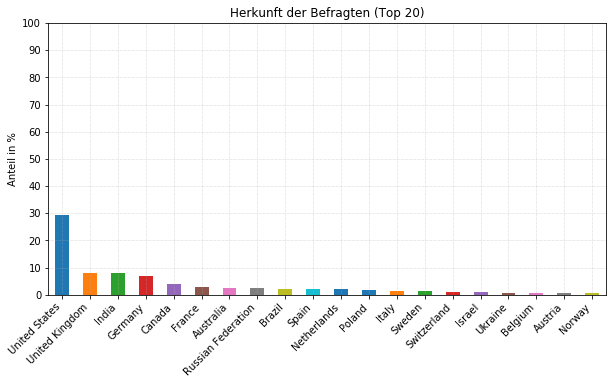

In [8]:
dfc_tmp.plot(title='Herkunft der Befragten (Top 20)', kind='bar', rot=45,
                                   figsize=[10,5])
plt.xticks(horizontalalignment='right');
plt.grid(linestyle=":", linewidth=0.5);
plt.yticks(ticks=np.arange(0,110,10));
plt.ylabel('Anteil in %');

In [9]:
#Alter
labels = ['Under 18 years old',
                             '18 - 24 years old',
                             '25 - 34 years old',
                             '35 - 44 years old',
                             '45 - 54 years old',
                             '55 - 64 years old',
                             '65 years or older']
values = df.Age.value_counts(sort=False, normalize=True).reindex(['Under 18 years old',
                                                 '18 - 24 years old',
                                                 '25 - 34 years old',
                                                 '35 - 44 years old',
                                                 '45 - 54 years old',
                                                 '55 - 64 years old',
                                                 '65 years or older'])*100

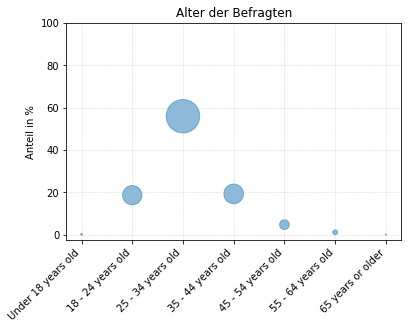

In [10]:
plt.scatter(x=labels, y=values, s=values*20, alpha=0.5);
plt.yticks(np.arange(0, 110, 20))
plt.xticks(rotation=45, horizontalalignment="right");
plt.grid(linestyle=":", linewidth=0.5);
plt.title('Alter der Befragten');
plt.ylabel('Anteil in %');

In [11]:
data = dict(
    type = "sankey",
    orientation = "h",
    valueformat = "%.2f%%",
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(
            color="black",
            width = 0.5),
        label= list(df.FormalEducation.unique())+['Mit akademischem Abschluss',
                                                  'Ohne akademischem Abschluss'],
        color= ['blue']*9 + ['green'] + ['orange']),
    link = dict(
        source = [0,1,2,3,4,5,6,7,8],
        target = [9,10,10,9,10,9,9,10,10],
        value = df.FormalEducation.value_counts()\
        .reindex(df.FormalEducation.unique())/len(df.FormalEducation)))
layout = dict(
    title="Bildungsabschlüsse der Befragten",
    font = dict(
      size = 10)
)
fig = dict(data = [data], layout=layout)
plotly.offline.iplot(fig, validate=False)

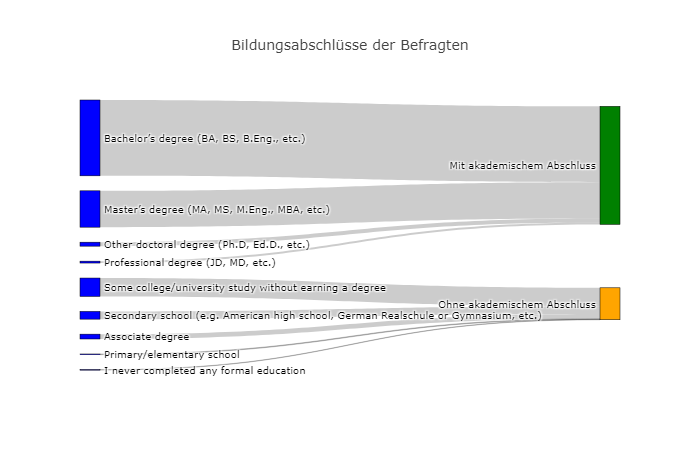

In [12]:
Image("newplot.png")

In [13]:
devtypes = pd.read_csv('DevType.csv')
devdata = devtypes.mean().sort_values(ascending=False) *100
colors = ['red', 'darksalmon', 'sienna', 'sandybrown', 'bisque', 'tan', 'gold', 'brown', 
         'olivedrab', 'palegreen', 'darkgreen', 'seagreen', 'darkcyan', 'slategrey', 'royalblue',
         'navy', 'blue', 'plum', 'm', 'coral', 'maroon', 'peachpuff']

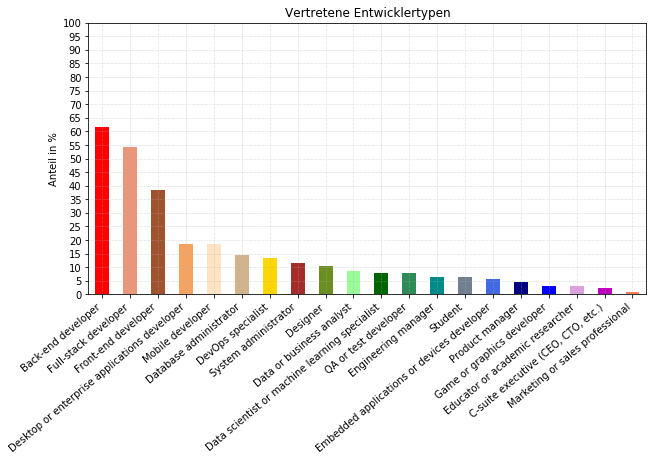

In [14]:
devdata.plot(xticks=range(len(devtypes.columns)), rot=40,figsize=(10,5), kind='bar',
                    color = colors, title='Vertretene Entwicklertypen');     
plt.xticks(horizontalalignment='right');
plt.grid(linestyle=":", linewidth=0.5);
plt.yticks(np.arange(0,105,5));
plt.ylabel('Anteil in %');

In [15]:
yc = df.YearsCoding.value_counts()
index = ['0-2 years', '3-5 years', '6-8 years', '9-11 years', '12-14 years', '15-17 years',
             '18-20 years', '21-23 years', '24-26 years', '27-29 years', '30 or more years']
yc = yc.reindex(index)

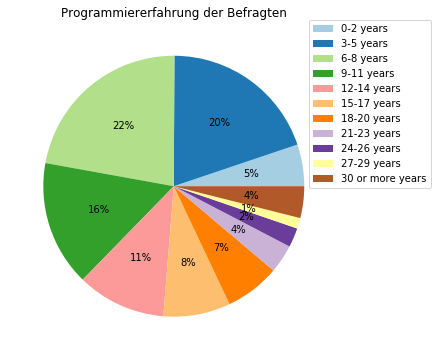

In [16]:
yc.plot(title='Programmiererfahrung der Befragten', kind='pie', labels=None,
                                  autopct="%1.0f%%", figsize=(6,6), colormap='Paired')


plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=index);

In [17]:
ycp = df.YearsCodingProf.value_counts().reindex(index)

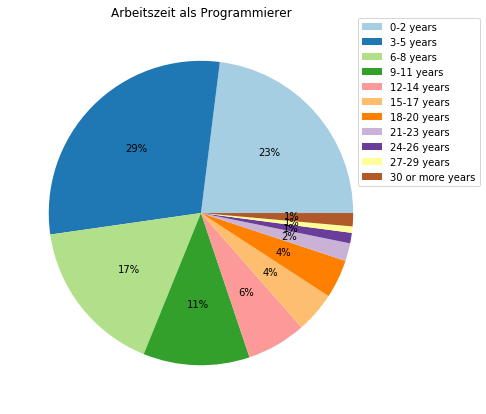

In [18]:
ycp.plot.pie(title="Arbeitszeit als Programmierer",figsize=(7,7), 
                                          autopct="%1.0f%%", labels=None, colormap='Paired')
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=index);

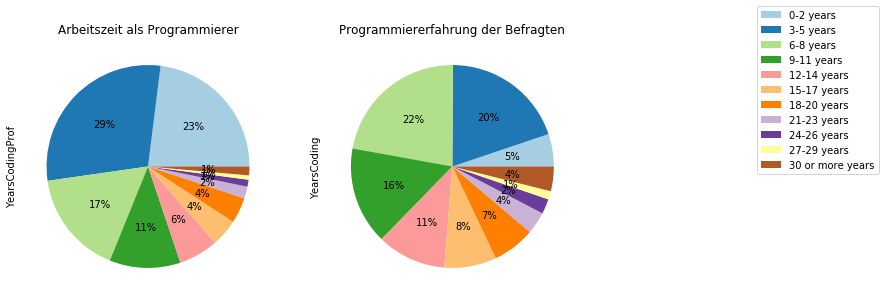

In [19]:
plt.subplot(1,2,1);
ycp.plot.pie(title="Arbeitszeit als Programmierer", 
                                          autopct="%1.0f%%", labels=None, colormap='Paired');
plt.subplot(1,2,2)
yc.plot(title='Programmiererfahrung der Befragten', kind='pie', labels=None,
                                  autopct="%1.0f%%",  colormap='Paired')
plt.legend(labels=index, bbox_to_anchor=(2.2,0.8),loc='right')
plt.gcf().set_size_inches(10,10)
plt.show()


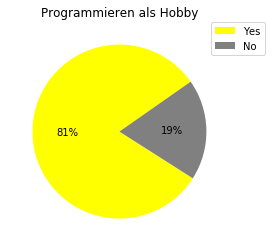

In [20]:
df.Hobby.value_counts().plot(title="Programmieren als Hobby", kind='pie', labels=None, 
                             autopct='%1.0f%%', colors=['yellow', 'grey'], startangle = 35)
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=df.Hobby.unique());

In [21]:
tmpdfjs = df.JobSatisfaction.value_counts(normalize=True).reindex(['Extremely satisfied',
                                             'Moderately satisfied',
                                             'Slightly satisfied',
                                             'Neither satisfied nor dissatisfied',
                                             'Slightly dissatisfied',
                                             'Moderately dissatisfied',
                                             'Extremely dissatisfied'])*100
#Zifriedenheit nochmal Kategorisiert
#Extremely satisfied und Moderately satisfied -> satisfied
#'Slightly satisfied', 'Neither satisfied nor dissatisfied','Slightly dissatisfied' -> neither
# 'Moderately dissatisfied', 'Extremely dissatisfied' -> dissatisfied                                    

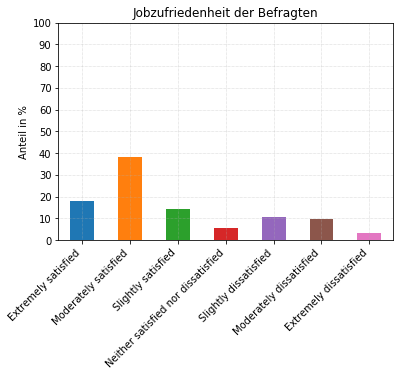

In [22]:
tmpdfjs.plot(title='Jobzufriedenheit der Befragten', kind='bar', rot=45);
plt.xticks( horizontalalignment="right");
plt.grid(linestyle=":", linewidth=0.5);
plt.ylabel('Anteil in %');
plt.yticks(np.arange(0,110,10));

In [23]:
tmpdfcsat = df.CareerSatisfaction.value_counts(normalize=True).reindex(['Extremely satisfied',
                                             'Moderately satisfied',
                                             'Slightly satisfied',
                                             'Neither satisfied nor dissatisfied',
                                             'Slightly dissatisfied',
                                             'Moderately dissatisfied',
                                             'Extremely dissatisfied'])*100

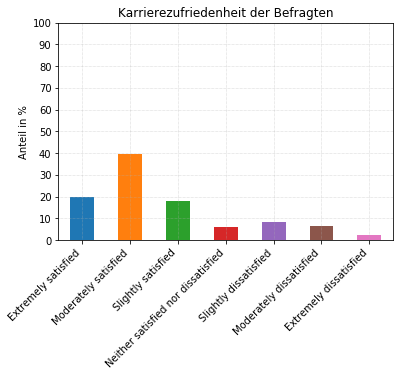

In [24]:
tmpdfcsat.plot(title='Karrierezufriedenheit der Befragten', kind='bar', rot=45)
plt.xticks( horizontalalignment="right");
plt.grid(linestyle=":", linewidth=0.5);
plt.yticks(np.arange(0,110,10));
plt.ylabel('Anteil in %');

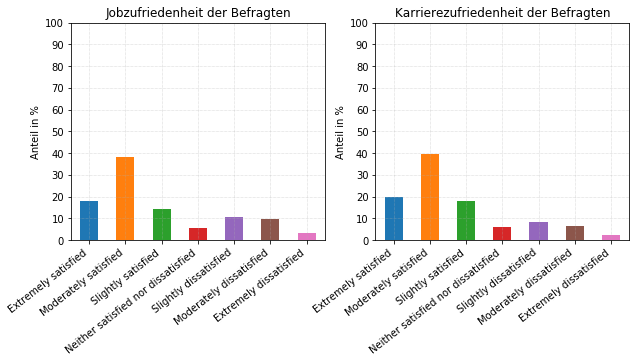

In [25]:
plt.subplot(1,2,1)
tmpdfjs.plot(title='Jobzufriedenheit der Befragten', kind='bar', rot=38);
plt.xticks( horizontalalignment="right"); plt.grid(linestyle=":", linewidth=0.5);
plt.yticks(np.arange(0,110,10)); plt.ylabel('Anteil in %');
plt.subplot(1,2,2)
tmpdfcsat.plot(title='Karrierezufriedenheit der Befragten', kind='bar', rot=38)
plt.xticks( horizontalalignment="right");plt.grid(linestyle=":", linewidth=0.5);
plt.yticks(np.arange(0,110,10)); plt.ylabel('Anteil in %');plt.gcf().set_size_inches(10,4)

In [26]:
tmpdfwt = df.WakeTime.value_counts(normalize=True).reindex(['I work night shifts',
                                    'After 12:01 PM',
                                    'Between 11:01 AM - 12:00 PM',
                                    'Between 10:01 - 11:00 AM',
                                    'Between 9:01 - 10:00 AM',
                                    'Between 8:01 - 9:00 AM',
                                    'Between 7:01 - 8:00 AM',
                                    'Between 6:01 - 7:00 AM',
                                    'Before 5:00 AM'])*100
#Andere Skalierung der x-Achse macht keinen Unterschied, da die unteren 3 Positionen sehr selten
#vertreten sind

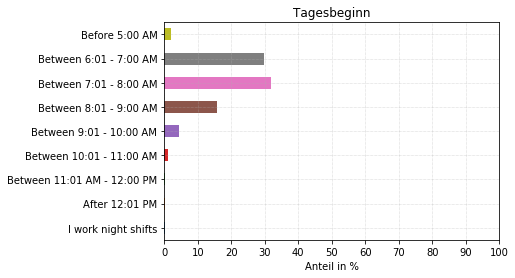

In [27]:
tmpdfwt.plot(title='Tagesbeginn', kind='barh');
plt.grid(linestyle=":", linewidth=0.5);
plt.xlabel('Anteil in %');
plt.xticks(np.arange(0,110,10));

In [28]:
tmpdfcs = df.CompanySize.value_counts(normalize=True).reindex(['Fewer than 10 employees',
                                      '10 to 19 employees',
                                      '20 to 99 employees',
                                      '100 to 499 employees',
                                      '500 to 999 employees',
                                      '1,000 to 4,999 employees',
                                      '5,000 to 9,999 employees',
                                      '10,000 or more employees',
                                      ])*100

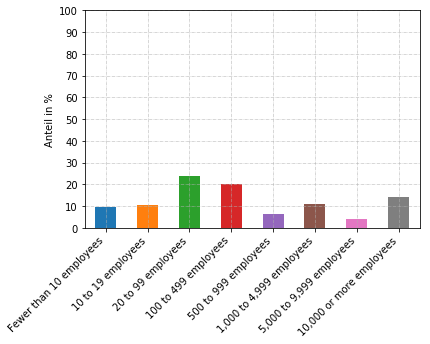

In [29]:
tmpdfcs.plot.bar(rot=45)
plt.xticks(horizontalalignment='right')
plt.grid(linestyle="-.", linewidth=0.5)
plt.ylabel('Anteil in %');
plt.yticks(np.arange(0,110,10));

In [30]:
languages = pd.read_csv('LanguagesWorkedWith.csv')
colors = ['red', 'darksalmon', 'sienna', 'sandybrown', 'bisque', 'tan', 'gold', 'brown', 
         'olivedrab', 'palegreen', 'darkgreen', 'seagreen', 'darkcyan', 'slategrey', 'royalblue',
         'navy', 'blue', 'plum', 'm', 'coral', 'maroon', 'peachpuff', 
          'darkorange', 'orange',
          'olive', 'yellowgreen', 'lightgreen', 'g', 'c', 'cadetblue', 'skyblue', 'dodgerblue',
         'darkblue', 'slateblue', 'rebeccapurple', 'darkviolet', 'violet', 'fuchsia']

In [81]:
langdata = languages.mean().sort_values(ascending=False)*100

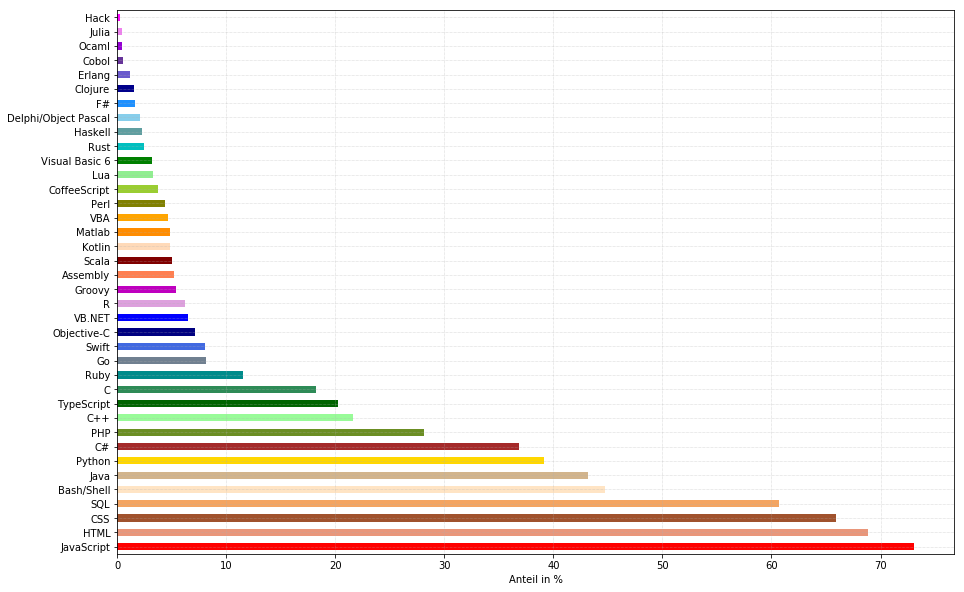

In [86]:
langdata.plot(figsize=(15,10), kind='barh', color = colors);
plt.grid(linestyle=":", linewidth=0.5);
plt.xlabel('Anteil in %');

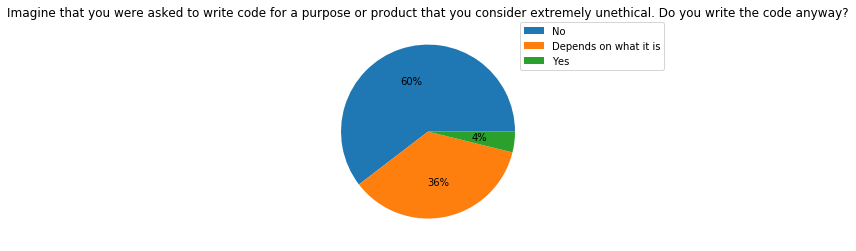

In [32]:
title = 'Imagine that you were asked to write code for a purpose or product that you consider extremely unethical. Do you write the code anyway?'
df.EthicsChoice.value_counts().plot(title=title, kind='pie', labels=None, autopct="%1.0f%%")
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=df.EthicsChoice.value_counts().index);

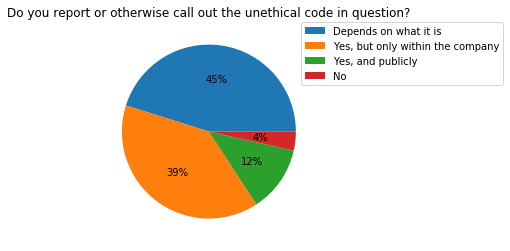

In [33]:
title = 'Do you report or otherwise call out the unethical code in question?'
df.EthicsReport.value_counts().plot(title=title, kind='pie',autopct='%1.0f%%',
                                       labels=None)
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", labels=df.EthicsReport.value_counts().index);

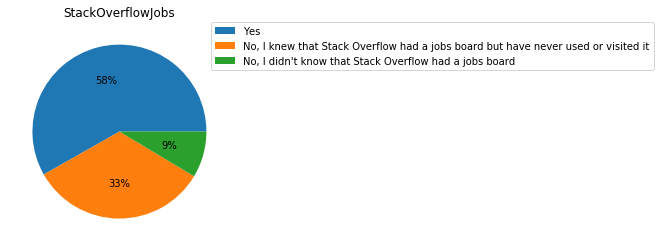

In [34]:
df.StackOverflowJobs.value_counts().plot(title="StackOverflowJobs", kind='pie', autopct='%1.0f%%',
                                       labels=None)
plt.ylabel(ylabel='');
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left", 
           labels=df.StackOverflowJobs.value_counts().index);

In [35]:
df2 = df.groupby(by=df.JobSatisfaction).mean()


## Analyse von Zusammenhängen zwischen der Jobzufriedenheit und weiteren Merkmalen

In [36]:
tmpdfsalsat = df2.reindex(['Extremely satisfied','Moderately satisfied' , 'Slightly satisfied',
             'Neither satisfied nor dissatisfied', 'Slightly dissatisfied',
             'Moderately dissatisfied', 'Extremely dissatisfied'])

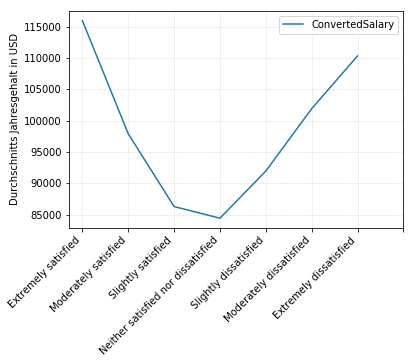

In [37]:
tmpdfsalsat.plot(xticks=range(8), rot=45, );
plt.xlabel(xlabel='');
plt.xticks(horizontalalignment="right");
plt.grid(linestyle=":", linewidth=0.5);
plt.ylabel('Durchschnitts Jahresgehalt in USD');

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.plotly as py
import networkx as nx
from sklearn.preprocessing import MinMaxScaler

In [39]:
d = pd.read_csv("datensatz_V2.csv")
dfs = d.loc[:,['JobSatisfaction','FormalEducation']]
lang = pd.read_csv('LanguagesWorkedWith.csv')
age = pd.read_csv('age.csv')

In [40]:
#Entfernt sprachen, die von weniger als 10% der befragten beherrscht werden
#ist vlt sinnvoll, da der Graph sonst eher unübersichtlich wird, außerdem haben Sprachen, 
#die am seltensten vorkommen oft die höchsten werte
#Alternativ in den Graphen nur die top 10-20 sprachen anzeigen
for col in lang.columns:
    if lang[col].mean() < 0.1:
        lang.drop(columns=col, inplace=True)
#Beibehaltene Sprachen
lang.columns

Index(['JavaScript', 'Python', 'Bash/Shell', 'C', 'C++', 'Java', 'SQL',
       'TypeScript', 'HTML', 'CSS', 'Ruby', 'PHP', 'C#'],
      dtype='object')

In [41]:
#Schritt für Schritt berechnet 
#abschluss 
fe_y = dfs[dfs.FormalEducation == 'yes']
#satisfied
#DataFrame in dem alle einträge satisfied und mit abschluss sind 
satyes = fe_y[fe_y.JobSatisfaction == 'satisfied']
# Wahrscheinlichkeit Abschluss zu haben und zufrieden zu sein P(mit Abschluss | satisfied)
sat1 = len(satyes)/(d.JobSatisfaction.value_counts()['satisfied'])
# Wahrscheinlichkeit zufrieden zu sein P (satisfied)
sat2 = d.JobSatisfaction.value_counts()['satisfied']/len(d)
# Wahrscheinlichkeit Abschluss zu haben
sat3 = d.FormalEducation.value_counts()['yes']/len(d)
# Wahrscheinlichkeit mit abschluss zufrieden zu sein P (satisfied | mit Abschluss)
psat = sat1*sat2/sat3
#neither
neiyes = fe_y[fe_y.JobSatisfaction == 'neither satisfied nor dissatisfied']
nei1 = len(neiyes) / d.JobSatisfaction.value_counts()['neither satisfied nor dissatisfied']
nei2 = d.JobSatisfaction.value_counts()['neither satisfied nor dissatisfied']/len(d)
nei3 = sat3
pnei = nei1 * nei2 / nei3
#dissatisfied
disyes = fe_y[fe_y.JobSatisfaction == 'dissatisfied']
dis1 = len(disyes) / d.JobSatisfaction.value_counts()['dissatisfied']
dis2 = d.JobSatisfaction.value_counts()['dissatisfied'] / len(d)
dis3 = sat3
pdis = dis1 * dis2 / dis3
#df erstellen 
feyes = pd.DataFrame(index=['satisfied','neither satisfied nor dissatisfied', 'dissatisfied' ], 
                     columns=fe_y.FormalEducation.unique(),data=[psat, pnei, pdis])

### Bayes-Theorem
Die konditionale Wahrscheinlichkeit des Eintretens eines Ereignisses c (Zufriedenheit) unter der Bedingung x (Feature)

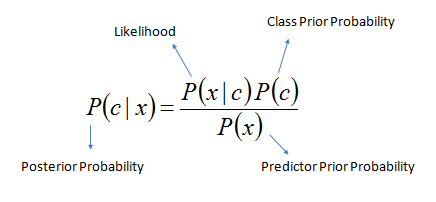

In [42]:
Image('formel.png')

In [43]:
#kein abschluss 
fe_n = dfs[dfs.FormalEducation == 'no']
#satisfied
satno = fe_n[fe_n.JobSatisfaction == 'satisfied']
sat1 = len(satno) / d.JobSatisfaction.value_counts()['satisfied']
sat2 = d.JobSatisfaction.value_counts()['satisfied']/len(d)
sat3 = d.FormalEducation.value_counts()['no']/len(d)
psat = sat1 * sat2 / sat3
#neither
neino = fe_n[fe_n.JobSatisfaction == 'neither satisfied nor dissatisfied']
nei1 = len(neino) / d.JobSatisfaction.value_counts()['neither satisfied nor dissatisfied']
nei2 = d.JobSatisfaction.value_counts()['neither satisfied nor dissatisfied']/len(d)
nei3 = sat3
pnei = nei1* nei2 / nei3
#dissatisfied
disno = fe_n[fe_n.JobSatisfaction == 'dissatisfied']
dis1 = len(disno)/ d.JobSatisfaction.value_counts()['dissatisfied']
dis2 = d.JobSatisfaction.value_counts()['dissatisfied'] / len(d)
dis3 = sat3
pdis = dis1 * dis2 / dis3
#df erstellen 
feno = pd.DataFrame(index=['satisfied','neither satisfied nor dissatisfied', 'dissatisfied' ],
                   columns=fe_n.FormalEducation.unique(), data=[psat, pnei, pdis])
# Dataframes von mit und ohne Abschluss verbinden
data_fe = feyes.join(feno)
# Umbenennen der Spalten
data_fe.columns=['with degree', 'without degree']

# Graph erstellen 


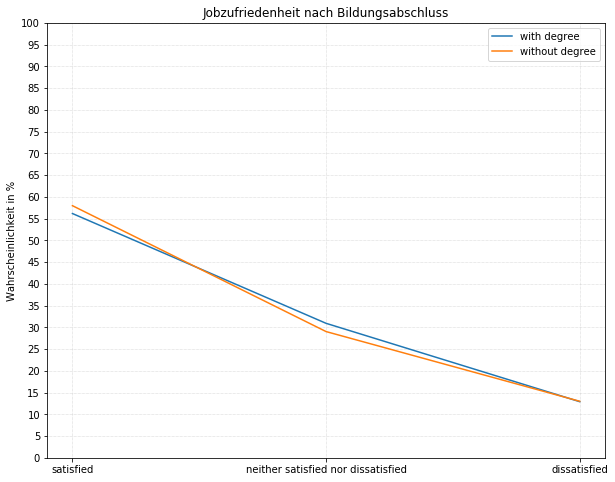

In [44]:
plt.plot(data_fe*100)
plt.legend(data_fe.columns)
plt.grid(linestyle=":", linewidth=0.5);
plt.yticks(np.arange(0,105, 5))
plt.gcf().set_size_inches(10,8)
plt.title('Jobzufriedenheit nach Bildungsabschluss');
plt.ylabel('Wahrscheinlichkeit in %');

In [45]:
# Im Grunde das gleiche wie oben nur diesmal als Funktion,
# außerdem Berechnung für Feature vorhanden und Feature nicht vorhanden
# Berechnet Wahrscheinlichkeit in der sich die Features des übergebenen Datensatzes auf Zufriedenheit
# auswirken 
df_sat = d.JobSatisfaction[d.JobSatisfaction == 'satisfied']
psat = len(df_sat) / len(d)

df_nei = d.JobSatisfaction[d.JobSatisfaction == 'neither satisfied nor dissatisfied']
pnei = len(df_nei) / len(d)

df_dis = d.JobSatisfaction[d.JobSatisfaction == 'dissatisfied']
pdis = len(df_dis) / len(d)

def probability(df_parameter, nach = 0):
    liste = []
    if nach == 0: liste = [1,0]
    if nach == 1: liste = [1]
    
    #Verbindet den übergebenen DAtaFrame mit der Zufriedenheit 
    feature_sat = df_parameter.join(df_sat, how='right')

    feature_nei = df_parameter.join(df_nei, how='right')

    feature_dis = df_parameter.join(df_dis, how='right')
    
    tmp = pd.DataFrame(index=['satisfied', 'neither', 'dissatisfied'])  
    #loop durch alle Features
    for col in df_parameter.columns:
        #Die ganze Berechnung einmal für feature vorhanden und feature nicht vorhanden
        for val in liste:
            #Berechnung der Wahrscheinlichkeit wenn Sprache beherrscht wird 
            #für satisfied
            p_s = feature_sat[col].value_counts()[val] / d.JobSatisfaction.value_counts()['satisfied']
            p_s = p_s * psat
            p_s = p_s / (df_parameter[col].value_counts()[val] / len(d))
            #für neither...
            p_n = feature_nei[col].value_counts()[val] /  d.JobSatisfaction \
                                            .value_counts()['neither satisfied nor dissatisfied']
            p_n = p_n * pnei
            p_n = p_n / (df_parameter[col].value_counts()[val] / len(d))

            #für dissatisfied
            p_d = feature_dis[col].value_counts()[val] / d.JobSatisfaction.value_counts()['dissatisfied']
            p_d = p_d * pdis
            p_d = p_d / (df_parameter[col].value_counts()[val] / len(d))
            
            #Ergebnis in DataFrame einfgügen
            if val == 0: tmp[col+'_no'] = [p_s, p_n, p_d]
            elif val == 1: tmp[col+'_yes'] = [p_s, p_n, p_d]
            p_s = 0
            p_n = 0
            p_d = 0
            
    return tmp        

In [46]:
#Erstellt DataFrames mit der Wahrscheinlichkeit dass man, wenn man eine Sprache beherrscht / 
#nicht beherrscht zufrieden ... unzufrieden wird 
data = probability(lang)
sat_links = data.sort_values(by='satisfied', axis=1, ascending=False).stack().reset_index()
sat_links.columns = ['satisfaction', 'language', 'pct']
sat_links = sat_links[sat_links.satisfaction == 'satisfied']

nei_links = data.sort_values(by='neither', axis=1, ascending=False)\
.stack().reset_index()
nei_links.columns = ['satisfaction', 'language', 'pct']
nei_links=nei_links[nei_links.satisfaction == 'neither']

dis_links = data.sort_values(by='dissatisfied', axis=1, ascending=False).stack().reset_index()
dis_links.columns = ['satisfaction', 'language', 'pct']
dis_links = dis_links[dis_links.satisfaction == 'dissatisfied']

In [87]:
#Auswahl wv Elemente dargestellt werden sollen:
sat_links = sat_links[:13]

# Erstellt Graphen, Parameter: DataFrame, verbindung von, verbindung nach
S = nx.from_pandas_edgelist(sat_links, 'satisfaction', 'language');
#Farben festlegen
color_map = [];
for node in S:
    if node == 'satisfied':
        color_map.append('green')
    else: color_map.append('lightblue')
#Größe der Nodes anhang der häufigkeit in der die Sprache benutzt wird festlegen
size_map = [];
for node in S:
    if node == 'satisfied':
        size_map.append(d.JobSatisfaction.value_counts()['satisfied']/10)
    else: 
        language = node.split('_') #entfernt _yes und _no 
        size = lang[language[0]].value_counts()[1]
        if language[1] == 'no':
            size = len(lang) - size
        size_map.append(size/10)
        
#Kantenlänge anhand der Wahrscheinlichkeit, dass man mit Sprache x Zufrieden wird 
tmp = sat_links.drop(columns='satisfaction').set_index('language');
#werte normalisieren

scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;
#Kantenlänge zuweisen 
for u,v,dat in S.edges(data=True):
    dat['weight'] = (tmp[v])*1.5


In [88]:
sat_links[:]

satisfaction        language       pct
0     satisfied        Ruby_yes  0.609284
1     satisfied  Bash/Shell_yes  0.590493
2     satisfied  TypeScript_yes  0.587179
3     satisfied      Python_yes  0.581251
4     satisfied         Java_no  0.575850
5     satisfied          C#_yes  0.571136
6     satisfied          PHP_no  0.570635
7     satisfied  JavaScript_yes  0.570058
8     satisfied         CSS_yes  0.569196
9     satisfied        HTML_yes  0.568653
10    satisfied            C_no  0.566725
11    satisfied          C++_no  0.565877
12    satisfied          SQL_no  0.565877

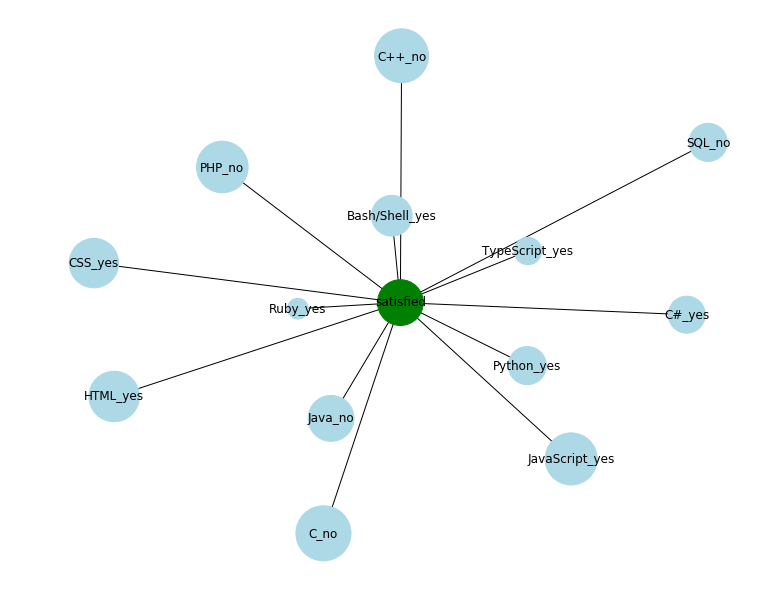

In [90]:
#Graph zeichnen
nx.draw(S, with_labels=True, node_color=color_map, node_size=size_map);
plt.gcf().set_size_inches(10,8);

In [91]:
#Auswahl wv Elemente dargestellt werden sollen:
nei_links = nei_links[:13]

# Erstellt Graphen, Parameter: DataFrame, verbindung von, verbindung nach
N = nx.from_pandas_edgelist(nei_links, 'satisfaction', 'language');
#Farben festlegen
color_map = [];
for node in N:
    if node == 'neither':
        color_map.append('orange')
    else: color_map.append('lightblue')
#Größe der Nodes anhang der häufigkeit in der die Sprache benutzt wird festlegen
size_map = [];

for node in N:
    if node == 'neither':
        size_map.append(d.JobSatisfaction.value_counts()['neither satisfied nor dissatisfied']/10)
    else: 
        language = node.split('_') #entfernt _yes und _no 
        size = lang[language[0]].value_counts()[1]
        if language[1] == 'no':
            size = len(lang) - size
        size_map.append(size/10)
        
#Kantenlänge anhand der Wahrscheinlichkeit, dass man mit Sprache x Zufrieden wird 
tmp = nei_links.drop(columns='satisfaction').set_index('language');
#werte normalisieren
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;
#Kantenlänge zuweisen 
for u,v,dat in N.edges(data=True):
    dat['weight'] = (tmp[v])*1.5

In [92]:
nei_links[:]

satisfaction       language       pct
26      neither  Bash/Shell_no  0.319809
27      neither       Java_yes  0.319280
28      neither      Python_no  0.314457
29      neither        PHP_yes  0.312985
30      neither          C_yes  0.312796
31      neither        C++_yes  0.312399
32      neither        Ruby_no  0.310228
33      neither  JavaScript_no  0.309837
34      neither  TypeScript_no  0.307307
35      neither        HTML_no  0.306181
36      neither         CSS_no  0.306147
37      neither        SQL_yes  0.305854
38      neither          C#_no  0.305494

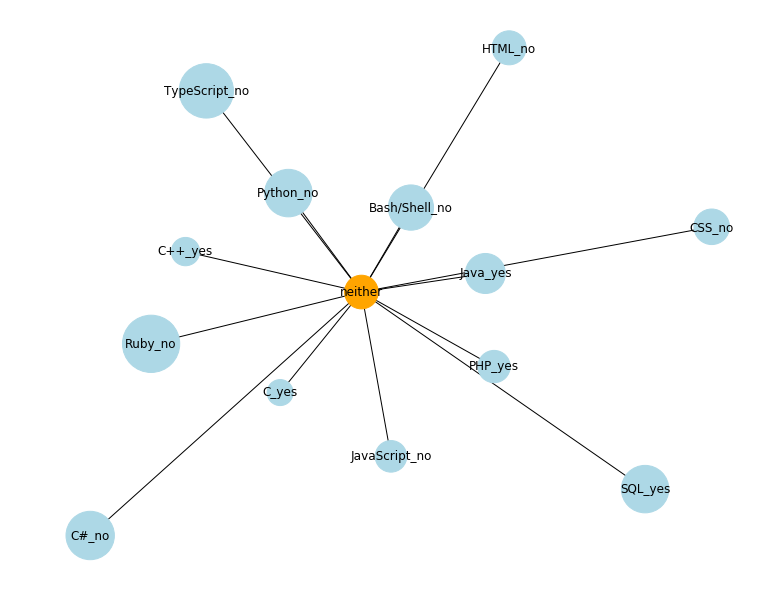

In [94]:
#Graph zeichnen
nx.draw(N, with_labels=True, node_color=color_map, node_size=size_map);
plt.gcf().set_size_inches(10,8);

In [95]:
#Auswahl wv Elemente dargestellt werden sollen:
dis_links = dis_links[:13]

# Erstellt Graphen, Parameter: DataFrame, verbindung von, verbindung nach
D = nx.from_pandas_edgelist(dis_links, 'satisfaction', 'language');
#Farben festlegen
color_map = [];
for node in D:
    if node == 'dissatisfied':
        color_map.append('red')
    else: color_map.append('lightblue')
#Größe der Nodes anhang der häufigkeit in der die Sprache benutzt wird festlegen
size_map = [];
for node in D:
    if node == 'dissatisfied':
        size_map.append(d.JobSatisfaction.value_counts()['dissatisfied']/10)
    else: 
        language = node.split('_') #entfernt _yes und _no 
        size = lang[language[0]].value_counts()[1]
        if language[1] == 'no':
            size = len(lang) - size
        size_map.append(size/10)
        
#Kantenlänge anhand der Wahrscheinlichkeit, dass man mit Sprache x Zufrieden wird 
tmp = dis_links.drop(columns='satisfaction').set_index('language');
#werte normalisieren
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;
#Kantenlänge zuweisen 
for u,v,dat in D.edges(data=True):
    dat['weight'] = (tmp[v])*1.5


In [96]:
dis_links[:]

satisfaction       language       pct
52  dissatisfied  JavaScript_no  0.136870
53  dissatisfied         CSS_no  0.135353
54  dissatisfied        HTML_no  0.135128
55  dissatisfied  Bash/Shell_no  0.134857
56  dissatisfied        PHP_yes  0.134451
57  dissatisfied  TypeScript_no  0.132645
58  dissatisfied          C#_no  0.132220
59  dissatisfied         C++_no  0.130929
60  dissatisfied      Python_no  0.130111
61  dissatisfied         SQL_no  0.129969
62  dissatisfied        Ruby_no  0.129940
63  dissatisfied           C_no  0.129788
64  dissatisfied        Java_no  0.129675

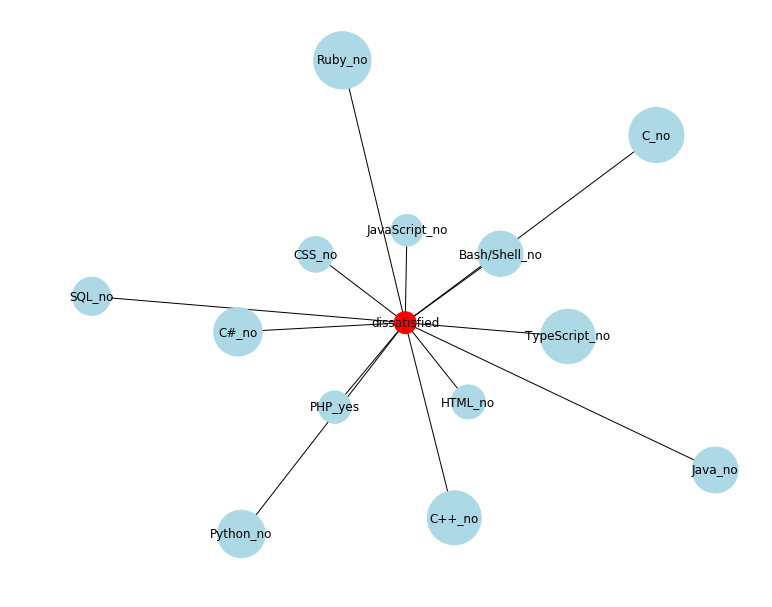

In [98]:
#Graph zeichnen
nx.draw(D, with_labels=True, node_color=color_map, node_size=size_map);
plt.gcf().set_size_inches(10,8);

In [99]:
#Erstellen des DF für Zufriedenheit und Unzufriedenheit nach Alter
a = probability(age)
cols = [c for c in a.columns if '_no' in c]
a.drop(columns=cols, inplace=True)

colls = []
for col in a.columns:
    colls.append(col.split('_')[1])
a.columns = colls

age_links = a.sort_values(by='satisfied', axis=1, ascending=False).stack().reset_index()
age_links.columns = ['satisfaction', 'age', 'pct']
age_sat_links = age_links[age_links.satisfaction == 'satisfied']

age_links = a.sort_values(by='dissatisfied', axis=1, ascending=False).stack().reset_index()
age_links.columns = ['satisfaction', 'age', 'pct']
age_dis_links = age_links[age_links.satisfaction == 'dissatisfied']

In [100]:
#Graph Zufriedenheit nach Alter 
AS = nx.from_pandas_edgelist(age_sat_links, 'satisfaction', 'age')
#Farben
color_map = []
for node in AS:
    if node == 'satisfied': color_map.append('green')
    else: color_map.append('blue')

#Nodegröße
size_map = []
for node in AS:
    if node == 'satisfied': size_map.append(len(df_sat)/10)
    else:
        alter = node.split('_yes')[0]
        size_map.append(age['Age_'+alter].value_counts()[1]/5)

#werte normalisieren
tmp = age_sat_links.drop(columns='satisfaction').set_index('age');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

#Kantenlänge
for u,v,dat in AS.edges(data=True):
    dat['weight'] = (tmp[v])*1.5


In [101]:
age_sat_links

satisfaction                 age       pct
0    satisfied  Under 18 years old  0.745455
1    satisfied   65 years or older  0.720000
2    satisfied   55 - 64 years old  0.621359
3    satisfied   35 - 44 years old  0.591831
4    satisfied   45 - 54 years old  0.591477
5    satisfied   18 - 24 years old  0.569117
6    satisfied   25 - 34 years old  0.551337

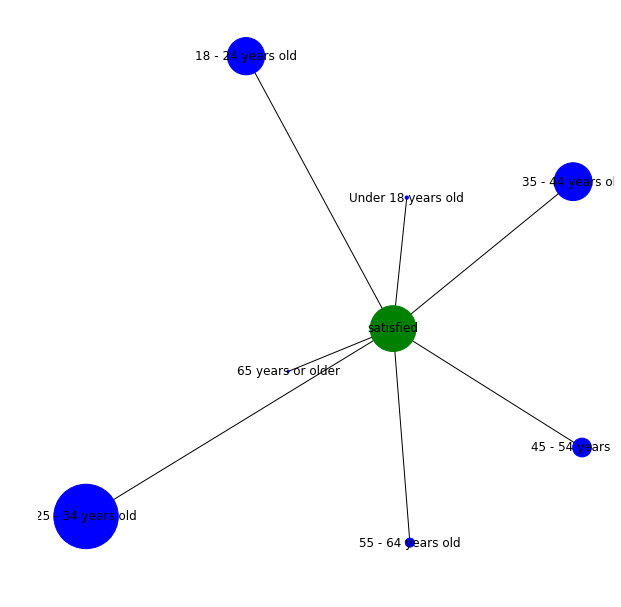

In [103]:
#Zeichnen
nx.draw(AS, with_labels=True, node_color=color_map, node_size=size_map);
plt.gcf().set_size_inches(8,8);

In [104]:
#Graph Zufriedenheit nach Alter 
AD = nx.from_pandas_edgelist(age_dis_links, 'satisfaction', 'age')
#Farben
color_map = []
for node in AD:
    if node == 'dissatisfied': color_map.append('red')
    else: color_map.append('blue')
        
#Nodegröße
size_map = []
for node in AD:
    if node == 'dissatisfied': size_map.append(len(df_dis)/10)
    else:
        alter = node.split('_yes')[0]
        size_map.append(age['Age_'+alter].value_counts()[1]/5)

#werte normalisieren
tmp = age_dis_links.drop(columns='satisfaction').set_index('age');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

#Kantenlänge
for u,v,dat in AD.edges(data=True):
    dat['weight'] = (tmp[v])*1.5

In [105]:
age_dis_links

satisfaction                 age       pct
14  dissatisfied   45 - 54 years old  0.169318
15  dissatisfied   55 - 64 years old  0.138350
16  dissatisfied   35 - 44 years old  0.134844
17  dissatisfied   25 - 34 years old  0.129800
18  dissatisfied   65 years or older  0.120000
19  dissatisfied   18 - 24 years old  0.111801
20  dissatisfied  Under 18 years old  0.054545

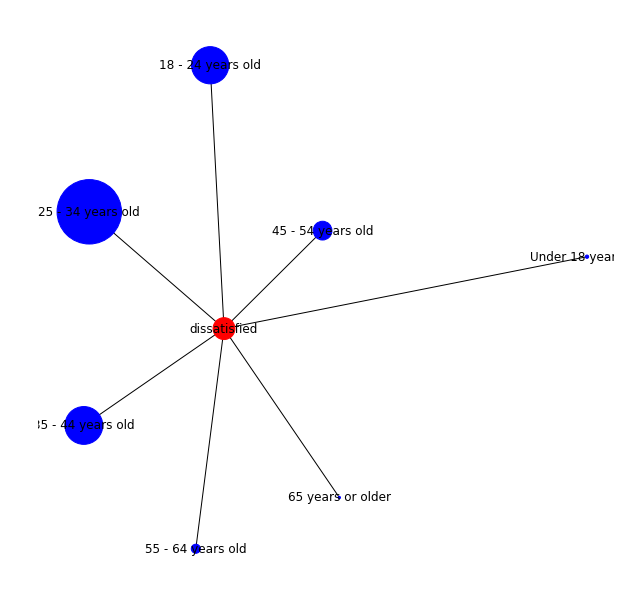

In [107]:
#Zeichnen
nx.draw(AD, with_labels=True, node_color=color_map, node_size=size_map);
plt.gcf().set_size_inches(8,8);

In [108]:
#Erstelle DF für Zufriedenheit nach Unternehmensgröße
cs = pd.read_csv('companysize.csv')
cs_data = probability(cs, 1)

colls = []
for col in cs_data.columns:
    colls.append(col.split('_')[1]+'_'+col.split('_')[2])
cs_data.columns = colls

cs_sat_links = cs_data.sort_values(by='satisfied', axis=1, ascending=False).stack().reset_index()
cs_sat_links.columns = ['satisfaction', 'company_size', 'pct']
cs_sat_links = cs_sat_links[cs_sat_links.satisfaction == 'satisfied']

cs_dis_links = cs_data.sort_values(by='dissatisfied', axis=1, ascending=False).stack().reset_index()
cs_dis_links.columns = ['satisfaction', 'company_size', 'pct']
cs_dis_links = cs_dis_links[cs_dis_links.satisfaction == 'dissatisfied']

In [109]:
#Graph Zufriedenheit - Company size
#nimmt nur die hälfte des datensatzes, um jede größe nur einmal zu haben
#sont wäre jede größe einmal mit _yes und einmal mit _no
CS = nx.from_pandas_edgelist(cs_sat_links[:], 'satisfaction', 'company_size')

#Farben festlegen
color_map = []
for node in CS:
    if node == 'satisfied': color_map.append("green")
    else: color_map.append('lightblue')

#node größe 
size_map = []
for node in CS:
    if node == 'satisfied': size_map.append(len(df_sat)/10)
    else:
        csize = node.split('_')[0]
        size = cs['CompanySize_'+csize].value_counts()[1]
        if node.split('_')[1] == 'no':
            size = len(cs) - size
        size_map.append(size/10)

#Katenlänge
tmp = cs_sat_links.drop(columns='satisfaction').set_index('company_size');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

for u, v, dat in CS.edges(data=True):
    dat['weight'] = (tmp[v])*1.5
      

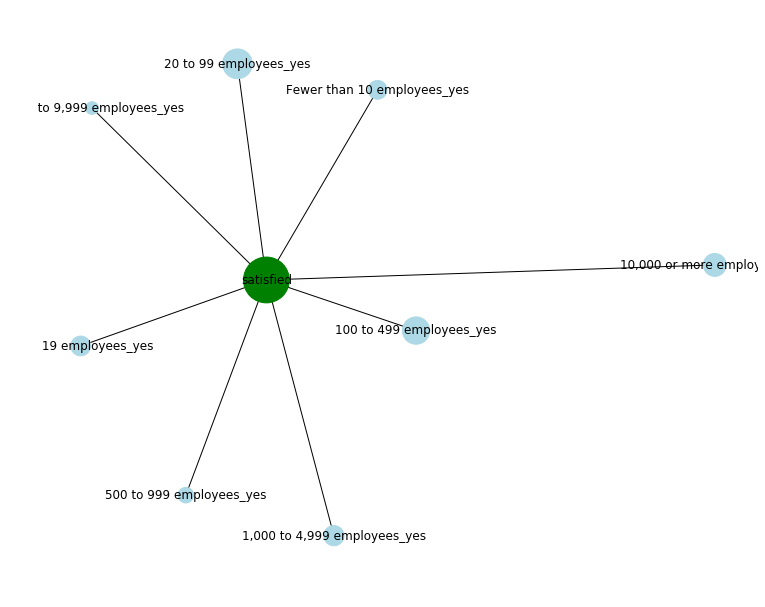

In [112]:
nx.draw(CS, with_labels=True, node_size = size_map, node_color = color_map);
plt.gcf().set_size_inches(10,8);

In [110]:
cs_sat_links[:]

satisfaction                  company_size       pct
0    satisfied        20 to 99 employees_yes  0.573255
1    satisfied      100 to 499 employees_yes  0.569819
2    satisfied      500 to 999 employees_yes  0.568676
3    satisfied   Fewer than 10 employees_yes  0.568240
4    satisfied  1,000 to 4,999 employees_yes  0.564568
5    satisfied        10 to 19 employees_yes  0.564247
6    satisfied  5,000 to 9,999 employees_yes  0.561205
7    satisfied  10,000 or more employees_yes  0.546236

In [113]:
#Graph Unzufriedenheit - Company size
#nimmt nur die hälfte des datensatzes, um jede größe nur einmal zu haben
#sont wäre jede größe einmal mit _yes und einmal mit _no
CD = nx.from_pandas_edgelist(cs_dis_links[:8], 'satisfaction', 'company_size')

#Farben festlegen
color_map = []
for node in CD:
    if node == 'dissatisfied': color_map.append("red")
    else: color_map.append('lightblue')

#node größe 
size_map = []
for node in CD:
    if node == 'dissatisfied': size_map.append(len(df_dis)/10)
    else:
        csize = node.split('_')[0]
        size = cs['CompanySize_'+csize].value_counts()[1]
        if node.split('_')[1] == 'no':
            size = len(cs) - size
        size_map.append(size/10)

#Katenlänge
tmp = cs_dis_links.drop(columns='satisfaction').set_index('company_size');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

for u, v, dat in CD.edges(data=True):
    dat['weight'] = (tmp[v])*1.5


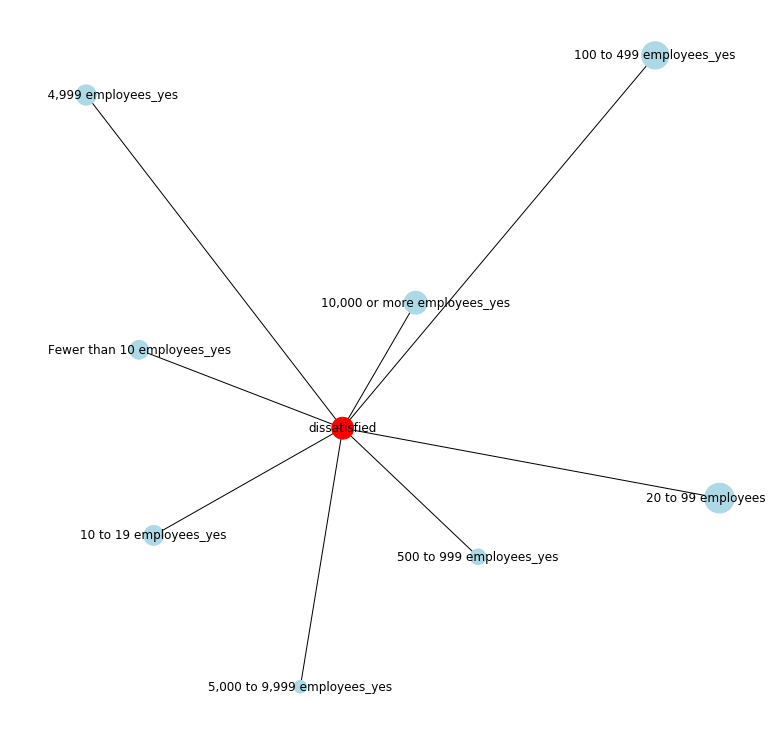

In [117]:
nx.draw(CD, with_labels=True, node_size = size_map, node_color = color_map);
plt.gcf().set_size_inches(10,10);

In [114]:
cs_dis_links[:8]

satisfaction                  company_size       pct
16  dissatisfied  10,000 or more employees_yes  0.144058
17  dissatisfied      500 to 999 employees_yes  0.135711
18  dissatisfied        10 to 19 employees_yes  0.134650
19  dissatisfied   Fewer than 10 employees_yes  0.133088
20  dissatisfied  5,000 to 9,999 employees_yes  0.129316
21  dissatisfied        20 to 99 employees_yes  0.124222
22  dissatisfied  1,000 to 4,999 employees_yes  0.122764
23  dissatisfied      100 to 499 employees_yes  0.121663

In [118]:
waketime = pd.read_csv('waketime.csv')
wt_data = probability(waketime, 1)
col = [c for c in wt_data.columns if '_no' in c]
wt_data.drop(columns=col, inplace = True)

colls = []
for col in wt_data.columns:
    colls.append(col.split('_')[1])
wt_data.columns = colls

wt_sat_links = wt_data.sort_values(by='satisfied', axis=1, ascending=False).stack().reset_index()
wt_sat_links.columns = ['satisfaction', 'wake_time', 'pct']
wt_sat_links = wt_sat_links[wt_sat_links.satisfaction == 'satisfied']

wt_dis_links = wt_data.sort_values(by='dissatisfied', axis=1, ascending=False).stack().reset_index()
wt_dis_links.columns = ['satisfaction', 'wake_time', 'pct']
wt_dis_links = wt_dis_links[wt_dis_links.satisfaction == 'dissatisfied']

In [119]:
#Graph waketime - Zufriedenheit 
WS = nx.from_pandas_edgelist(wt_sat_links, 'satisfaction', 'wake_time');

#Farben
color_map = [];
for node in WS:
    if node == 'satisfied':
        color_map.append('green')
    else: color_map.append('blue')
    
#Node size
size_map = []
for node in WS:
    if node == 'satisfied': size_map.append(len(df_sat)/3)
    else: 
        wt = node.split('_yes')[0]
        size_map.append(waketime['WakeTime_'+wt].value_counts()[1]/3)
        
#Kantenlänge
tmp = wt_sat_links.drop(columns='satisfaction').set_index('wake_time');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

for u, v, dat in WS.edges(data=True):
    dat['weight'] = (tmp[v])*1.5


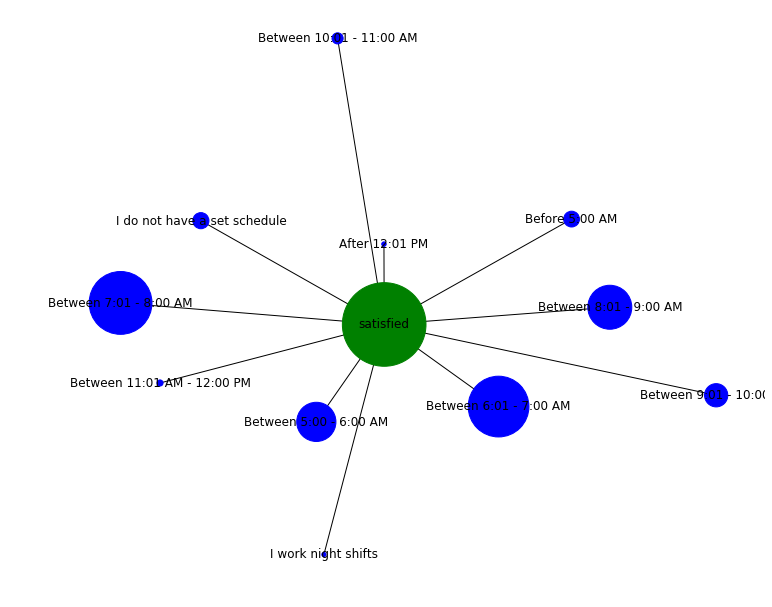

In [122]:
nx.draw(WS, node_size=size_map, node_color=color_map, with_labels=True);
plt.gcf().set_size_inches(10,8);

In [120]:
wt_sat_links

satisfaction                     wake_time       pct
0     satisfied                After 12:01 PM  0.610169
1     satisfied        Between 6:01 - 7:00 AM  0.581670
2     satisfied        Between 5:00 - 6:00 AM  0.574837
3     satisfied        Between 8:01 - 9:00 AM  0.567833
4     satisfied   Between 11:01 AM - 12:00 PM  0.562500
5     satisfied        Between 7:01 - 8:00 AM  0.556400
6     satisfied                Before 5:00 AM  0.546791
7     satisfied  I do not have a set schedule  0.546735
8     satisfied       Between 9:01 - 10:00 AM  0.523399
9     satisfied           I work night shifts  0.500000
10    satisfied      Between 10:01 - 11:00 AM  0.490566

In [123]:
#Graph waketime - Unzufriedenheit 
WD = nx.from_pandas_edgelist(wt_dis_links, 'satisfaction', 'wake_time');

#Farben
color_map = [];
for node in WD:
    if node == 'dissatisfied':
        color_map.append('red')
    else: color_map.append('blue')
    
#Node size
size_map = []
for node in WD:
    if node == 'dissatisfied': size_map.append(len(df_dis)/10)
    else: 
        wt = node.split('_yes')[0]
        size_map.append(waketime['WakeTime_'+wt].value_counts()[1]/3)
        
#Kantenlänge
tmp = wt_dis_links.drop(columns='satisfaction').set_index('wake_time');
scaler = MinMaxScaler();
scaled_values = scaler.fit_transform(tmp);
tmp.pct = scaled_values;
tmp.pct += 0.1;
tmp = tmp.T;

for u, v, dat in WD.edges(data=True):
    dat['weight'] = (tmp[v])*1.5
    


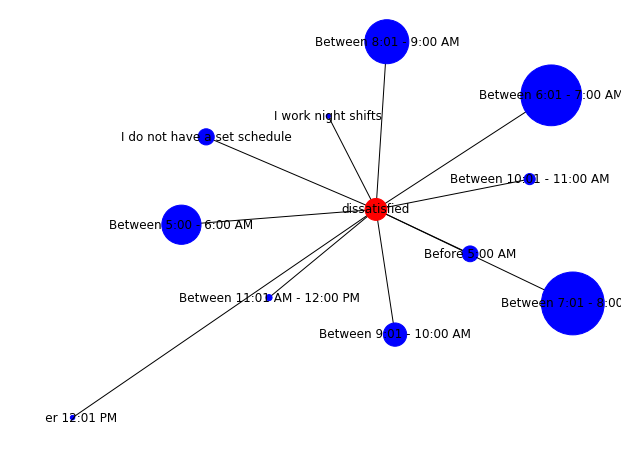

In [126]:
nx.draw(WD, node_size=size_map, node_color=color_map, with_labels=True);
plt.gcf().set_size_inches(8,6);

In [124]:
wt_dis_links

satisfaction                     wake_time       pct
22  dissatisfied                Before 5:00 AM  0.172460
23  dissatisfied      Between 10:01 - 11:00 AM  0.150943
24  dissatisfied           I work night shifts  0.148148
25  dissatisfied   Between 11:01 AM - 12:00 PM  0.142857
26  dissatisfied       Between 9:01 - 10:00 AM  0.141626
27  dissatisfied  I do not have a set schedule  0.138284
28  dissatisfied        Between 5:00 - 6:00 AM  0.136443
29  dissatisfied        Between 7:01 - 8:00 AM  0.127491
30  dissatisfied        Between 6:01 - 7:00 AM  0.124876
31  dissatisfied        Between 8:01 - 9:00 AM  0.123772
32  dissatisfied                After 12:01 PM  0.101695

In [77]:
hobby_data = pd.read_csv('hobby.csv')
hobby = probability(hobby_data)
hobby.drop(columns=["Hobby_No_no", 'Hobby_Yes_no'], inplace=True)
hobby.columns = ["Hobby_No", "Hobby_Yes"]
hobby = hobby.T*100
width = 0.5

satisfied    neither  dissatisfied
Hobby_No   53.899281  32.834532     13.266187
Hobby_Yes  57.167513  29.984400     12.848087

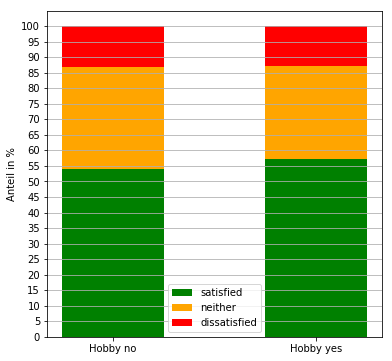

In [78]:
b1 = plt.bar(np.arange(2), hobby.satisfied, color='green', width=width, bottom=0)
b2 = plt.bar(np.arange(2), hobby.neither, color='orange', width=width, bottom=hobby.satisfied)
b3 = plt.bar(np.arange(2), hobby.dissatisfied, color='red', width=width, 
             bottom=hobby['neither']+hobby.satisfied)
plt.xticks(ticks=[0,1], labels=['Hobby no', 'Hobby yes'])
plt.grid(axis="y")
plt.yticks(ticks=np.linspace(0,100,21));
fig = plt.gcf()
fig.set_size_inches(6,6);
plt.ylabel('Anteil in %');
plt.legend((b1[0], b2[0], b3[0]),hobby.columns );
hobby

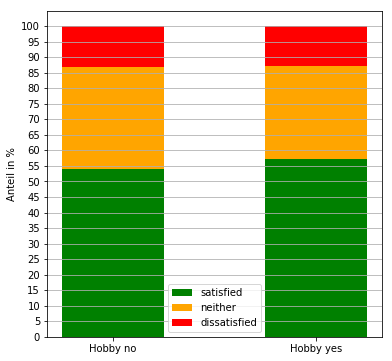

In [79]:
fig

In [80]:
hobby

satisfied    neither  dissatisfied
Hobby_No   53.899281  32.834532     13.266187
Hobby_Yes  57.167513  29.984400     12.848087